In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("Set2")

land_cover = pd.read_excel(r'land_cover.xlsx')
greenhouse_gases = pd.read_excel(r'greenhouse_gases.xlsx')
climate_change = pd.read_excel(r'climate_change.xlsx')
air_pollution = pd.read_excel(r'air_pollution.xlsx')
hdi = pd.read_excel(r'hdi.xlsx')
climate_patterns = pd.read_excel(r'climate_patterns.xlsx')

greenhouse_gases = greenhouse_gases.iloc[: , 1:]
#climate_change = climate_change.iloc[: , 1:]
air_pollution = air_pollution.iloc[: , 1:]
land_cover = land_cover.iloc[: , 1:]
hdi = hdi.iloc[: , 2:]
climate_patterns = climate_patterns.iloc[: , 1:]

In [29]:
data = pd.merge(greenhouse_gases, climate_change, how='left', 
                left_on=['country','year'], right_on = ['country','year'])
data = pd.merge(data, climate_patterns, how='left', 
                left_on=['country','year'], right_on = ['country','year'])
data = pd.merge(data, air_pollution, how='left', 
                left_on=['country','year'], right_on = ['country','year'])
data = pd.merge(data, land_cover, how='left', 
                left_on=['country','year'], right_on = ['country','year'])
data = pd.merge(data, hdi, how='left', 
                left_on=['country','year'], right_on = ['country','year'])
#data.set_index(['country', 'year'], inplace=True)
data.drop(['forest.perc', 'inland.perc', 'urban.perc', 'agricult.perc','sust.level.min', 
           'sust.level.max', 'checks', 'pm2.5.aqi', 'pm10.aqi', 'o3.aqi'], axis=1, inplace=True)
data

,country,year,co2.em,ch4.em,n2o.em,ch4.cap,co2.cap,n2o.cap,sust.level.ghg,min.temp,...,inland.waters,urban.land,agricult.land,forest.land,forest.inland.perc,urban.agricult.perc,land.dom,sust.level.land,hdi,hdi.level
0,Afghanistan,1990,2582389,7883730,2196570,0.644,0.211,0.179,Sustainable,-4.2,...,0.0,238.010000,380400.0,12084.4,1.850994,58.303160,human,Not sustainable,0.302,Low
1,Afghanistan,1991,2490067,8038870,2277290,0.619,0.192,0.175,Sustainable,-5.7,...,0.0,249.940222,380300.0,12084.4,1.850994,58.289670,human,Not sustainable,0.307,Low
2,Afghanistan,1992,1717605,8189080,2256860,0.586,0.123,0.161,Sustainable,-4.7,...,0.0,261.870444,380300.0,12084.4,1.850994,58.291497,human,Not sustainable,0.316,Low
3,Afghanistan,1993,1578188,8379250,2274100,0.555,0.105,0.151,Sustainable,-5.9,...,0.0,273.800667,379340.0,12084.4,1.850994,58.146280,human,Not sustainable,0.312,Low
4,Afghanistan,1994,1284149,8702020,2251540,0.538,0.079,0.139,Sustainable,-5.0,...,0.0,285.730889,378130.0,12084.4,1.850994,57.962769,human,Not sustainable,0.307,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Uzbekistan,2011,115985250,52687160,10724250,1.810,3.990,0.369,Sustainable,-8.4,...,22000.0,4866.521333,254170.0,33895.6,12.493429,57.898194,human,Not sustainable,0.676,Medium
1296,Uzbekistan,2012,118627503,54309560,11301410,1.840,4.020,0.383,Sustainable,-11.1,...,22000.0,4890.986000,252360.0,34295.2,12.582745,57.499103,human,Not sustainable,0.685,Medium
1297,Uzbekistan,2013,106538178,53285430,11753100,1.780,3.550,0.392,Sustainable,-5.5,...,22000.0,4915.450667,250600.0,34694.8,12.766138,57.535178,human,Not sustainable,0.692,Medium
1298,Uzbekistan,2014,107638705,54513660,12038880,1.790,3.530,0.395,Sustainable,-12.1,...,22000.0,4939.915333,255420.0,35094.4,12.718055,57.996435,human,Not sustainable,0.696,Medium


In [30]:
conditions = [
    (data['sust.level.clim'] == 0) & (data['country'] == 'Afghanistan')]
choices = ['Sustainable']
data['sust.level.clim'] = np.select(conditions, choices)

In [31]:
conditions = [
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Sustainable'),
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Sustainable'),
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Sustainable'),
    
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Sustainable'),
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Sustainable'),
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Sustainable'),
   
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Sustainable'),
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Sustainable'),
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
        
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
    (data['sust.level.ghg'] == 'Quite sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Quite sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Quite sustainable'),
    (data['sust.level.ghg'] == 'Sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Sustainable') & (data['sust.level.aqi'] == 'Not sustainable'),
    (data['sust.level.ghg'] == 'Not sustainable') & (data['sust.level.land'] == 'Not sustainable') & (data['sust.level.aqi'] == 'Sustainable'),]

choices = ['Sustainable', 'Sustainable', 'Sustainable', 'Sustainable', 
           'Quite sustainable', 'Quite sustainable', 'Quite sustainable', 'Quite sustainable', 
           'Quite sustainable', 'Quite sustainable', 'Quite sustainable', 'Quite sustainable', 
           'Quite sustainable', 'Quite sustainable', 'Quite sustainable', 'Quite sustainable', 
           'Quite sustainable', 'Quite sustainable', 'Quite sustainable', 'Quite sustainable', 
           'Not sustainable', 'Not sustainable', 'Not sustainable', 'Not sustainable',
           'Not sustainable', 'Not sustainable', 'Not sustainable']
data['sust.level'] = np.select(conditions, choices)

#DROP ROWS WITH NAN VALUES OF URBAN LAND
data = data.fillna(0)
data = data[data['urban.land'] != 0]
data.reset_index(inplace=True)
data.to_excel(r'final.xlsx')

In [32]:
corr = data.corr()

Text(0.5, 1.0, 'Correlation matrix of original dataset')

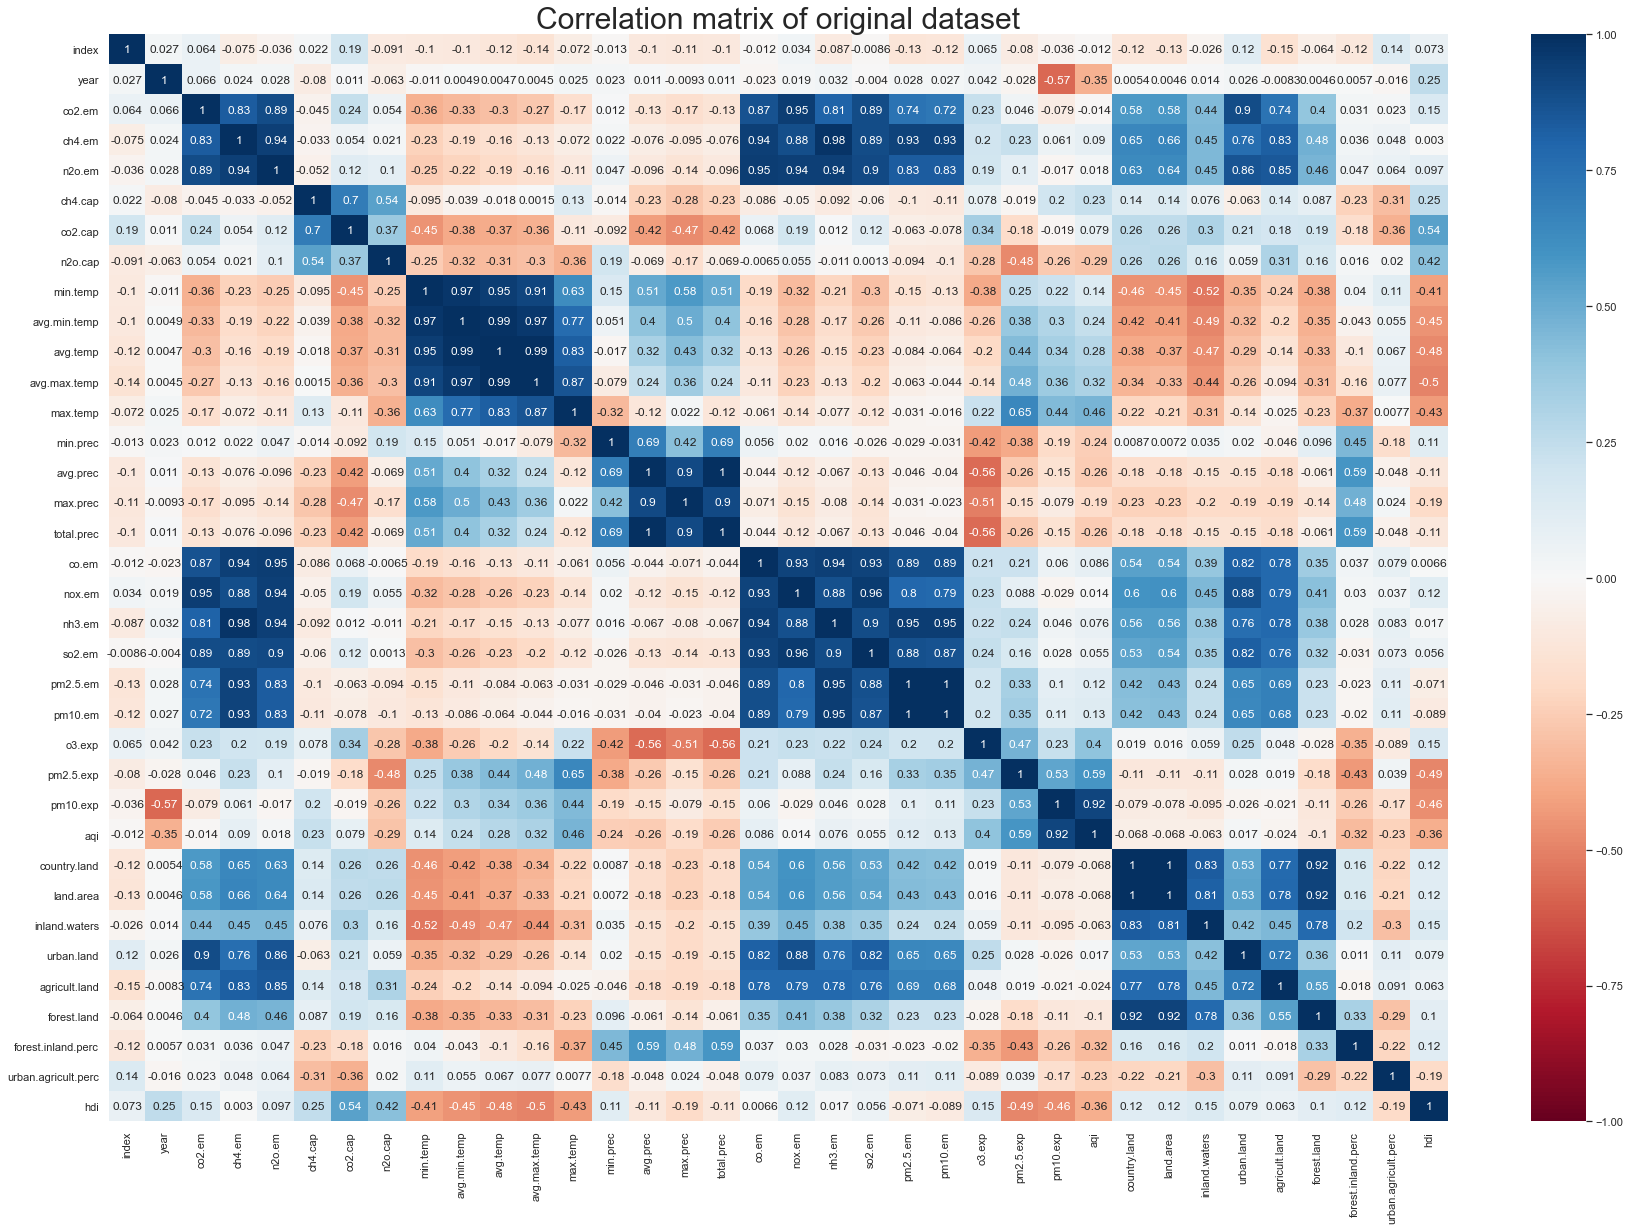

In [33]:
plt.subplots(figsize=(30,20)) 
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0, cmap= 'RdBu')
plt.title("Correlation matrix of original dataset", size = 30)

In [34]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.69
to_drop = [column for column in upper.columns if any(upper[column] > 0.69)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

for col in data.columns:
    print(col)

index
country
year
co2.em
ch4.cap
n2o.cap
sust.level.ghg
min.temp
min.prec
min.temp.pat
max.temp.pat
prec.pat
sust.level.clim
o3.exp
pm2.5.exp
pm10.exp
aqi.bucket
sust.level.aqi
country.land
forest.inland.perc
urban.agricult.perc
land.dom
sust.level.land
hdi
hdi.level
sust.level


Text(0.5, 1.0, 'Correlation matrix of reduced dataset')

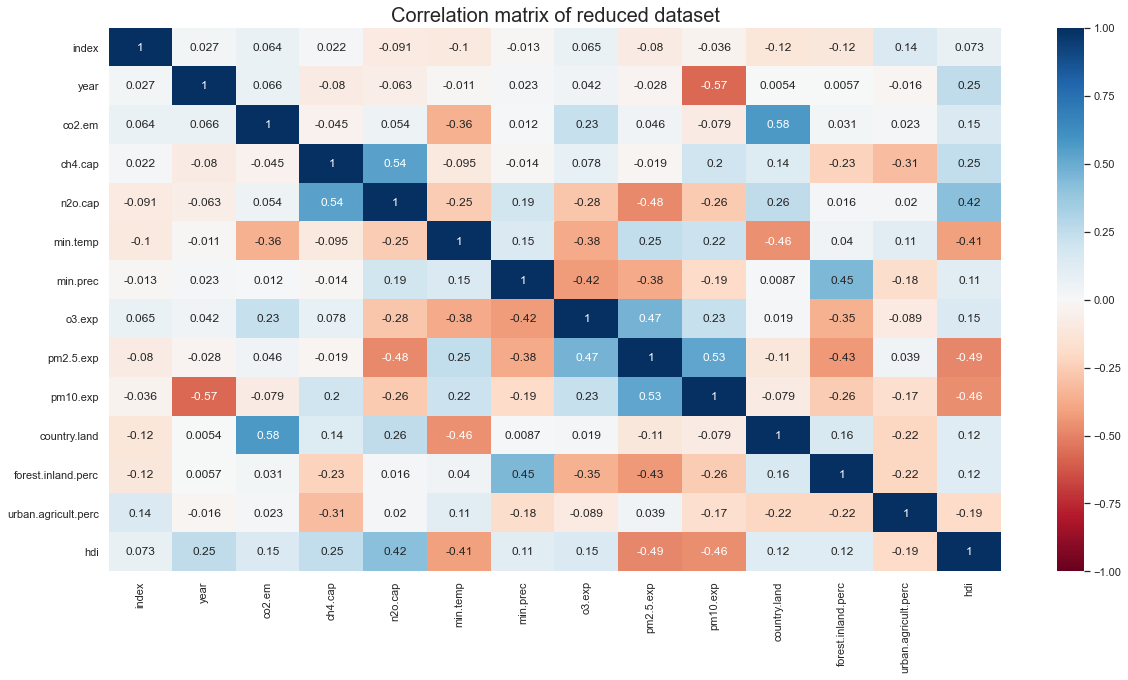

In [35]:
corr = data.corr()
plt.subplots(figsize=(20,10)) 
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0, cmap= 'RdBu')
plt.title("Correlation matrix of reduced dataset", size = 20)

In [36]:
data = data.reset_index()
data = data.iloc[: , 2:]
data



,country,year,co2.em,ch4.cap,n2o.cap,sust.level.ghg,min.temp,min.prec,min.temp.pat,max.temp.pat,...,aqi.bucket,sust.level.aqi,country.land,forest.inland.perc,urban.agricult.perc,land.dom,sust.level.land,hdi,hdi.level,sust.level
0,Afghanistan,1990,2582389,0.644,0.179,Sustainable,-4.2,2.9,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,58.303160,human,Not sustainable,0.302,Low,Quite sustainable
1,Afghanistan,1991,2490067,0.619,0.175,Sustainable,-5.7,5.0,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,58.289670,human,Not sustainable,0.307,Low,Quite sustainable
2,Afghanistan,1992,1717605,0.586,0.161,Sustainable,-4.7,4.7,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,58.291497,human,Not sustainable,0.316,Low,Quite sustainable
3,Afghanistan,1993,1578188,0.555,0.151,Sustainable,-5.9,3.7,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,58.146280,human,Not sustainable,0.312,Low,Quite sustainable
4,Afghanistan,1994,1284149,0.538,0.139,Sustainable,-5.0,7.2,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,57.962769,human,Not sustainable,0.307,Low,Quite sustainable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,Uzbekistan,2011,115985250,1.810,0.369,Sustainable,-8.4,0.9,0,0,...,Moderate,Quite sustainable,447400.0,12.493429,57.898194,human,Not sustainable,0.676,Medium,Quite sustainable
1274,Uzbekistan,2012,118627503,1.840,0.383,Sustainable,-11.1,0.8,0,0,...,Moderate,Quite sustainable,447400.0,12.582745,57.499103,human,Not sustainable,0.685,Medium,Quite sustainable
1275,Uzbekistan,2013,106538178,1.780,0.392,Sustainable,-5.5,1.3,0,0,...,Moderate,Quite sustainable,444103.0,12.766138,57.535178,human,Not sustainable,0.692,Medium,Quite sustainable
1276,Uzbekistan,2014,107638705,1.790,0.395,Sustainable,-12.1,0.6,0,0,...,Moderate,Quite sustainable,448924.0,12.718055,57.996435,human,Not sustainable,0.696,Medium,Quite sustainable


In [37]:
data.to_excel(r'final_reduced.xlsx')